# Домашнее задание №3

<span style="color: red; font-size: 14pt">Дедлайн: 20 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com`` (или в телеграм-канал)
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 30 минут

### Задача 1 (10% баллов)

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x)$, $b_2(x)$ и $b_3(x)$, каждый из которых ошибается с вероятностью p. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1$, $w_2$ и $w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов:

$$a_0 = \sum_{i=1}^3 w_i [b_i(x)=0]$$
$$a_1 = \sum_{i=1}^3 w_i [b_i(x)=1]$$


Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Например, если первые два алгоритма голосуют за класс $0$, а третий — за класс $1$, то выбирается класс $0$, если $w_1 + w_2 > w_3$, и класс $1$ в противном случае. Какова вероятность ошибки такой композиции этих трех алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
2. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$? 

**Решение: **

1) Рассмотрим все варианты поведения нашего алгоритма. Построим таблицу: первые три столбца отвечают за алгоримы $b_1(x)$, $b_2(x)$ и $b_3(x)$, а четвертый столбец отвечает за сумму. Верный ответ алгоритма - 1, ошибка - 0.

| $b_1$ | $b_2$ | $b_3$ | $sum$ |
|------:|-------|-------|-------|
| 0     | 0     | 0     | 0     |
| 0     | 0     | 1     | 0     |
| 0     | 1     | 0     | 0     |
| 0     | 1     | 1     | 1     |
| 1     | 0     | 0     | 0     |
| 1     | 0     | 1     | 1     |
| 1     | 1     | 0     | 1     |
| 1     | 1     | 1     | 1     |

Посчитаем вероятность ошибки, посчитав все 0(ошибки) в таблице: $p^3 + 3p^2(1-p) = p^3 + 3p^2-3p^3 = 3p^2 - 2p^3$

2) Аналогичную таблицу сделаем для второго пункта:

| $b_1$ | $b_2$ | $b_3$ | $sum$ |
|------:|-------|-------|-------|
| 0     | 0     | 0     | 0     |
| 0     | 0     | 1     | 0     |
| 0     | 1     | 0     | 1     |
| 0     | 1     | 1     | 1     |
| 1     | 0     | 0     | 0     |
| 1     | 0     | 1     | 0     |
| 1     | 1     | 0     | 1     |
| 1     | 1     | 1     | 1     |

Посчитаем вероятность ошибки, посчитав все 0(ошибки) в таблице: $p^3 + 2p^2(1 - p) + p(1-p)^2 = p^3 + 2p^2 - 2p^3 + p(1 - 2p + p^2) = p^3 + 2p^2 - 2p^3 + p - 2p^2 + p^3 = p$

### Задача 2 (10% баллов)

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка $[0,1]$, которые можно интерпретировать как вероятности принадлежности объектов классу $1$. В качестве функции потерь возьмем отрицательный логарифм правдоподобия:
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

**Решение: ** 

Будем искать финальный алгоритм классификации в виде композиции:
$$F_M(x)=\sum_{m=1}^{M}\gamma_m b_m(x)$$
Однако подбор оптиматильного набора параметров {$b_m,\gamma_m$}, m $\in$ 1,...,M – очень трудоемкая задача. Поэтому мы будем пытаться построить такую композицию путем жадного наращивания, каждый раз добавляя в сумму слагаемое, являющееся наиболее оптимальным алгоритмом из возможных. Будем считать, что нами уже построен классификатор $F_{m−1}$ длины m−1. Таким образом задача сводится к поиску пары наиболее оптимальных параметров {$a_m,\gamma_m$} для классификатора длины m:
$$F_m(x) = F_{m-1} + \gamma_m b_m(x)$$

Оптимальность здесь понимается в соответствии с принципом явной максимизации отступов. Это означает, что вводится некоторая функция потерь $L(y_i, F_m(x_i))$, i = 1,...,N, показывающая, насколько "сильно" предсказанный ответ $F_m(x_i)$ отличается от правильного ответа $y_i$. И затем минимизируется функционал ошибки:

$$Q = \sum_{i=1}^{N} L(y_i, F_m(x_i)) \rightarrow min$$
Заметим, что функционал ошибки Q – вещественная функция, зависящая от точек {$F_m(x_i)$},i=1,...,N в N-мерном пространстве, и нам необходимо решить задачу минимизации этого функционала. Сделаем это, реализуя один шаг метода градиентного спуска. В качестве точки, для которой мы будем искать оптимальное приращение, рассмотрим $F_{m−1}$. Найдем градиент функционала ошибки:

$$\nabla Q = \left[ \frac{\partial Q}{\partial F_{m-1}}(x_i)\right]_{i=1}^{N} = \left[ \frac{\partial (\sum_{i=1}^{N} L(y_i, F_{m-1}))}{\partial F_{m-1}}(x_i)\right]_{i=1}^{N} = \left[ \frac{\partial L(y_i, F_{m-1})}{\partial F_{m-1}}(x_i)\right]_{i=1}^{N}$$ 
Таким образом, в силу метода градиентного спуска, наиболее выгодно добавить новое слагаемое в классификатор следующим образом:
$$F_m(x) = F_{m-1} - \gamma_m \nabla Q $$
где $\gamma_m$ подбирается линейным поиском по вещественным числам R:
$$\gamma_m = argmin_{\gamma} \sum_{i=1}^{N}L(y_i, sigm(F_{m-1}(x_i)-\gamma b_m(x_i)))$$ 

$$b_m = argmin_b \sum_{i=1}^{N}L(\nabla Q_i, b(x_i))$$ 

### Задача 3 (10% баллов)

Известно, что на $n$-й итерации двухклассового метода AdaBoost
был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

**Решение: ** Воспользуемся алгоритмом с лекции (все обозначения сохраним):
$$err_m = \frac{\sum_{i=1}^N w_i^{(n)} \cdot I(y_i \neq G_m(x_i))}{\sum_{i=1}^N w_i^{(n)}} = \frac{w_j^{(n)}}{\sum_{i=1}^N w_i^{(n)}}$$

$$\alpha_m = log((1 - err_m) / err_m) = log(\frac{1 - \frac{w_j^{(n)}}{\sum_{i=1}^N w_i^{(n)}}}{\frac{w_j^{(n)}}{\sum_{i=1}^N w_i^{(n)}}}) = log(\frac{ \sum_{i=1}^N w_i^{(n)} - w_j^{(n)}}{w_j^{(n)}})$$

Ненормированный новый вес:

$$(w_i)_{not}^{(n+1)} = w_i^{(n)} \cdot exp(\alpha_m \cdot I(y_i \neq G_m(x_i))$$
Откуда получаем 2 варианта: если i $\neq$ j, то
$$(w_i)_{not}^{(n+1)} = w_i^{(n)}$$
А если i = j, то 
$$(w_j)_{not}^{(n+1)} = w_j^{(n)} \cdot exp(\alpha_m) = w_j^{(n)} \cdot exp(log(\frac{ \sum_{i=1}^N w_i^{(n)} - w_j^{(n)}}{w_j^{(n)}})) = w_j^{(n)} \cdot \frac{ \sum_{i=1}^N w_i^{(n)} - w_j^{(n)}}{w_j^{(n)}} = \sum_{i=1}^N w_i^{(n)} - w_j^{(n)}$$

Теперь отнормируем $(w_j)_{not}^{(n+1)}$ и получим $w_j^{(n+1)}$:

$$w_j^{(n+1)} = \frac{(w_j)_{not}^{(n+1)}}{\sum_{i=1}^N (w_i)_{not}^{(n+1)}} = \frac{\sum_{i=1}^N w_i^{(n)} - w_j^{(n)}}{\sum_{i=1, i \neq j}^N (w_i)_{not}^{(n+1)} + (w_j)_{not}^{(n+1)}} = \frac{\sum_{i=1}^N w_i^{(n)} - w_j^{(n)}}{\sum_{i=1, i \neq j}^N w_i^{(n)} + \sum_{i=1}^N w_i^{(n)} - w_j^{(n)}} = \frac{\sum_{i=1}^N w_i^{(n)} - w_j^{(n)}}{\sum_{i=1}^N w_i^{(n)} - w_j^{(n)} + \sum_{i=1}^N w_i^{(n)} - w_j^{(n)}} = \frac{\sum_{i=1}^N w_i^{(n)} - w_j^{(n)}}{2 (\sum_{i=1}^N w_i^{(n)} - w_j^{(n)})} = \frac{1}{2}$$

## Часть 2. Random Forest

##### 70% баллов за задание, оценочное время выполнения 3 часа

### Реализация (40%)

**Необходимо реализовать класс `RandomForest`** (для решения задачи классификации)

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    - `num_trees` - количество деревьев в лесе;
    - `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    - `max_features` - количество признаков, принимаемое к рассмотрению при разбиении (аналогичный параметр есть в sklearn имплементации). Параметр может принимать значения:
        - int - тогда рассматриваем max_features признаков при каждом разбиении;
        - float - max_features обозначает процент, int(max_features * n_features) признаков рассматривается при каждом разбиении;
        - “sqrt” - max_features=sqrt(n_features);
        - “log2” - max_features=log2(n_features);
        - None - max_features=n_features;
    - `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', по умолчанию - 'gini'); функции с подсчетом энтропийного и критерия Джини можно взять из предыдущего дз;
    
- класс имеет методы `fit` и `predict`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `RandomForest`, представляющий собой Random Forest, обученный по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов;

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from math import log2, sqrt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
def bagging_and_RSM(X, y):
    #Implement random sampling here
    indexes = np.random.choice(X.shape[0], X.shape[0])
    
    sample_X = X[indexes]
    sample_y = y[indexes]

    return sample_X, sample_y

In [44]:
class RandomForest(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees, max_depth=np.inf, max_features=None, criterion='gini'):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.trees = []
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        
        for i in range(self.num_trees):
            X, y = bagging_and_RSM(X_train, y_train)
            self.trees.append(DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth, max_features=self.max_features))
            self.trees[i].fit(X, y)
            
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        y_pred = np.zeros(X_test.shape[0])
        responses = []
        for i in range(self.num_trees):
            responses.append(self.trees[i].predict(X_test))
            
        for j in range(X_test.shape[0]):
            tmp = []
            for i in range(self.num_trees):
                tmp.append(responses[i][j])
            y_pred[j] = np.argmax(np.bincount(tmp))
        return y_pred

### Тестирование (15%)

Загрузите датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить Random Forest на предложенном датасете

In [45]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
columns = ('class alcohol malic_acid ash alcalinity_of_ash magnesium total_phenols flavanoids nonflavanoid_phenols \
           proanthocyanins color_intensity hue OD280_or_OD315_of_diluted_wines proline')
df.columns = columns.split()

In [46]:
data = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', \
           'proanthocyanins', 'color_intensity', 'hue', 'OD280_or_OD315_of_diluted_wines', 'proline']]
target = df[['class']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, test_size=0.2, random_state=42)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
clf = RandomForest(num_trees=10, max_depth=2)
clf.fit(X_train, y_train)
print("Accuracy score: ", accuracy_score(y_test, clf.predict(X_test)))

Accuracy score:  0.944444444444


Покажите, как менялись значения критерия качества `accuracy` при увеличении параметра num_trees. Видны ли следы переобучения?

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


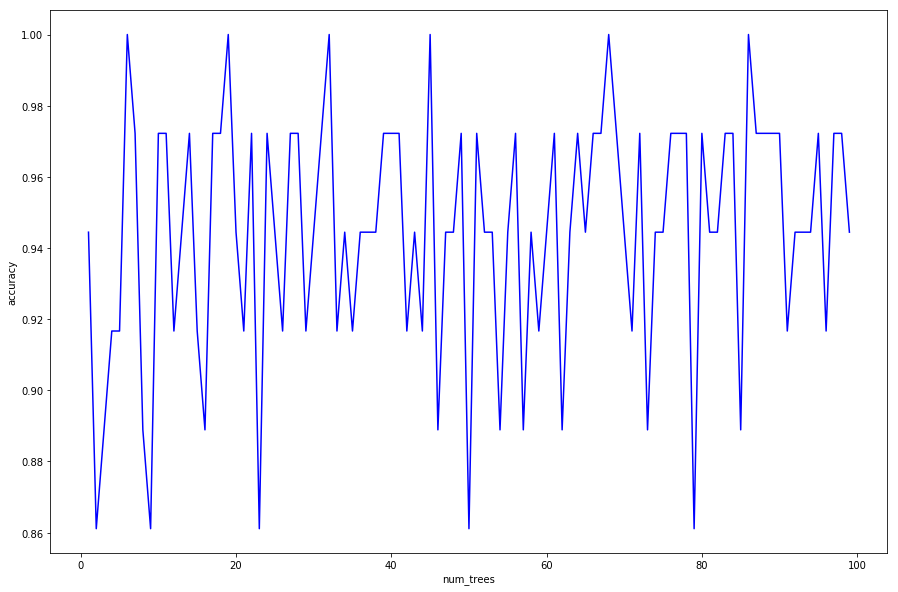

In [50]:
num_trees_array = list(range(1,100))
scores = []

for num_trees in num_trees_array:
    clf = RandomForest(num_trees=num_trees, max_depth=2)
    clf.fit(X_train, y_train.ravel())
    scores.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(15,10))
plt.plot(num_trees_array, scores, color='blue')
plt.xlabel('num_trees')
plt.ylabel('accuracy')
plt.legend()

**Вывод: ** Следов переобучения не видно. Можно сделать вывод, что Random Forest не переобучается (или переобучается слабо).

Сравните качество работы вашей реализации RandomForest и реализации из sklearn.

Сравним по отдельности все 4 параметра RandomForest при фиксации остальных:

Num_trees:

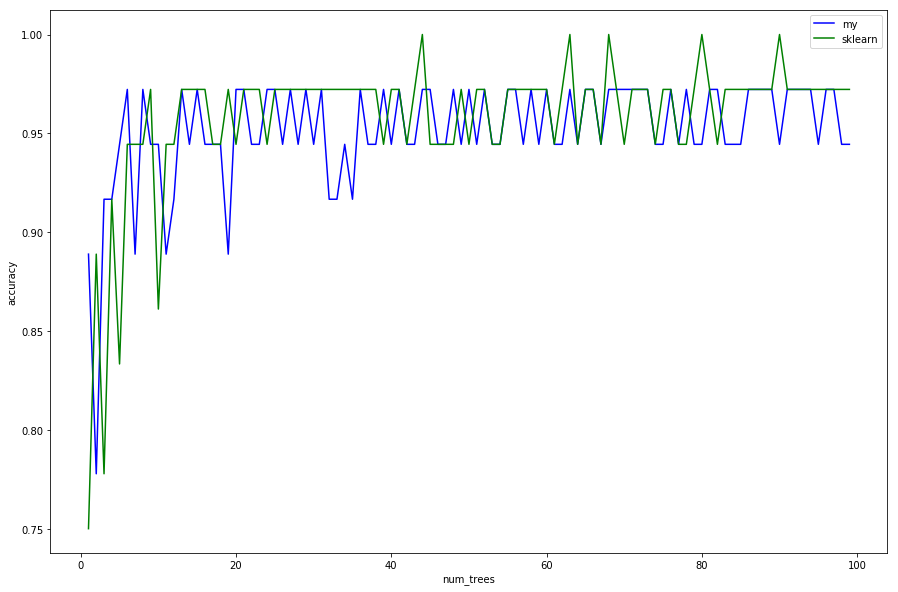

In [51]:
num_trees_array = list(range(1,100))
scores_my = []
scores_sklearn = []

for num_trees in num_trees_array:
    clf_my = RandomForest(num_trees=num_trees, max_depth=2, max_features="sqrt", criterion='gini')
    clf_my.fit(X_train, y_train.ravel())
    scores_my.append(accuracy_score(y_test, clf_my.predict(X_test)))

    clf_sklearn= RandomForestClassifier(n_estimators=num_trees, criterion='gini', max_depth=2, max_features="sqrt")
    clf_sklearn.fit(X_train, y_train.ravel())
    scores_sklearn.append(accuracy_score(y_test, clf_sklearn.predict(X_test)))
    
plt.figure(figsize=(15,10))
plt.plot(num_trees_array, scores_my, color='blue', label="my")
plt.plot(num_trees_array, scores_sklearn, color='green', label="sklearn")
plt.xlabel('num_trees')
plt.ylabel('accuracy')
plt.legend()

Max_depth:

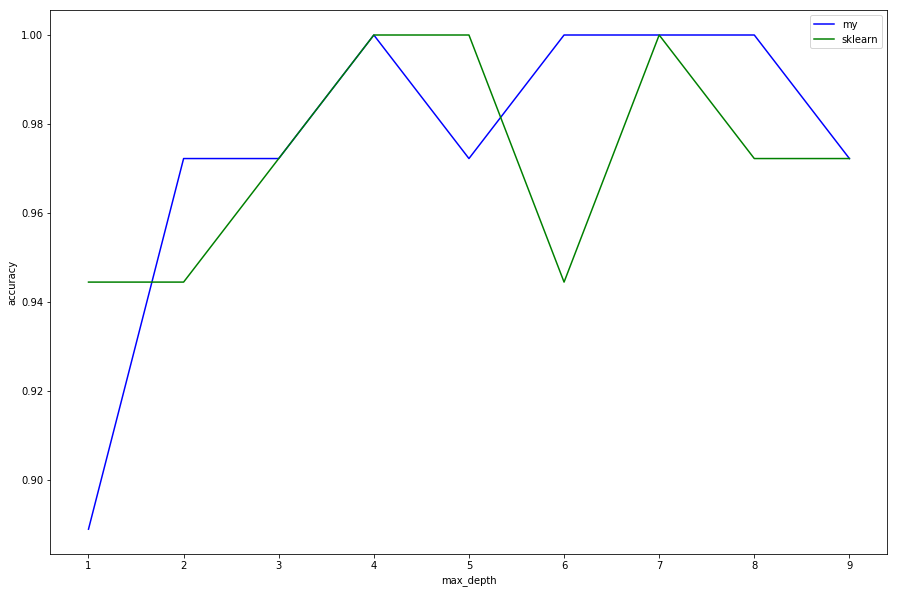

In [52]:
max_depth_array = list(range(1,10))
scores_my = []
scores_sklearn = []

for max_depth in max_depth_array:
    clf_my = RandomForest(num_trees=10, max_depth=max_depth, max_features="sqrt", criterion='gini')
    clf_my.fit(X_train, y_train.ravel())
    scores_my.append(accuracy_score(y_test, clf_my.predict(X_test)))

    clf_sklearn= RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=max_depth, max_features="sqrt")
    clf_sklearn.fit(X_train, y_train.ravel())
    scores_sklearn.append(accuracy_score(y_test, clf_sklearn.predict(X_test)))
    
plt.figure(figsize=(15,10))
plt.plot(max_depth_array, scores_my, color='blue', label="my")
plt.plot(max_depth_array, scores_sklearn, color='green', label="sklearn")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [53]:
clf_my = RandomForest(num_trees=10, max_depth=2, max_features="log2", criterion='gini')
clf_my.fit(X_train, y_train.ravel())
print("Accuracy score нашего RandomForest: ", accuracy_score(y_test, clf_my.predict(X_test)))

clf_sklearn= RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=2, max_features="log2")
clf_sklearn.fit(X_train, y_train.ravel())
print("Accuracy score RandomForest из sklearn: ", accuracy_score(y_test, clf_sklearn.predict(X_test)))

Accuracy score нашего RandomForest:  0.944444444444
Accuracy score RandomForest из sklearn:  0.944444444444


In [54]:
clf_my = RandomForest(num_trees=10, max_depth=2, max_features="log2", criterion='entropy')
clf_my.fit(X_train, y_train.ravel())
print("Accuracy score нашего RandomForest: ", accuracy_score(y_test, clf_my.predict(X_test)))

clf_sklearn= RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=2, max_features="log2")
clf_sklearn.fit(X_train, y_train.ravel())
print("Accuracy score RandomForest из sklearn: ", accuracy_score(y_test, clf_sklearn.predict(X_test)))

Accuracy score нашего RandomForest:  0.944444444444
Accuracy score RandomForest из sklearn:  0.972222222222


**Вывод:** Мы написали очень хорошую реализацию RandomForest. Она работает примерно с такой же точностью, что и RandomForest из sklearn.

### Модификация Random Forest (15%)

Измените свою реализацию `RandomForest` так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. Сравните результат работы с обычным RandomForest.

Скачаем заново датасет:

In [55]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
columns = ('class alcohol malic_acid ash alcalinity_of_ash magnesium total_phenols flavanoids nonflavanoid_phenols \
           proanthocyanins color_intensity hue OD280_or_OD315_of_diluted_wines proline')
df.columns = columns.split()
data = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', \
           'proanthocyanins', 'color_intensity', 'hue', 'OD280_or_OD315_of_diluted_wines', 'proline']]
target = df[['class']]
X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, test_size=0.2, random_state=42)

In [56]:
def bagging_and_RSM(X, y, max_features):
    #Implement random sampling here
    indexes_features = np.random.choice(X.shape[1], max_features)
    indexes = np.random.choice(X.shape[0], X.shape[0])
    
    sample_X = X[:, indexes_features][indexes]
    sample_y = y[indexes]

    return sample_X, sample_y, indexes_features

In [57]:
class ModifiedRandomForest(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees, max_depth=np.inf, max_features=None, criterion='gini'):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.trees = []
        self.indexes = []
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        if type(self.max_features) is int:
            pass
        elif type(self.max_features) is float:
            self.max_features = int(self.max_features * X_train.shape[1])
        elif self.max_features == "sqrt":
            self.max_features = int(sqrt(X_train.shape[1]))
        elif self.max_features == "log2":
            self.max_features = int(log2(X_train.shape[1]))
        else:
            self.max_features = X_train.shape[1]
        
        for i in range(self.num_trees):
            X, y, ind = bagging_and_RSM(X_train, y_train, self.max_features)
            self.indexes.append(ind)
            self.trees.append(DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth))
            self.trees[i].fit(X, y)
            
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        y_pred = np.zeros(X_test.shape[0])
        responses = []
        for i in range(self.num_trees):
            responses.append(self.trees[i].predict(X_test[:, self.indexes[i]]))
        for j in range(X_test.shape[0]):
            tmp = []
            for i in range(self.num_trees):
                tmp.append(responses[i][j])
            y_pred[j] = np.argmax(np.bincount(tmp))
        return y_pred

Сравним результат работы с обычным RandomForest:

In [60]:
clf_my = ModifiedRandomForest(num_trees=10, max_depth=2, max_features="sqrt", criterion='gini')
clf_my.fit(X_train, y_train.ravel())
print("Accuracy score нашего RandomForest: ", accuracy_score(y_test, clf_my.predict(X_test)))

clf_sklearn= RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=2, max_features="sqrt")
clf_sklearn.fit(X_train, y_train.ravel())
print("Accuracy score RandomForest из sklearn: ", accuracy_score(y_test, clf_sklearn.predict(X_test)))

Accuracy score нашего RandomForest:  0.972222222222
Accuracy score RandomForest из sklearn:  0.972222222222


Также, можно построить график зависимости accuracy от количества деревьев:

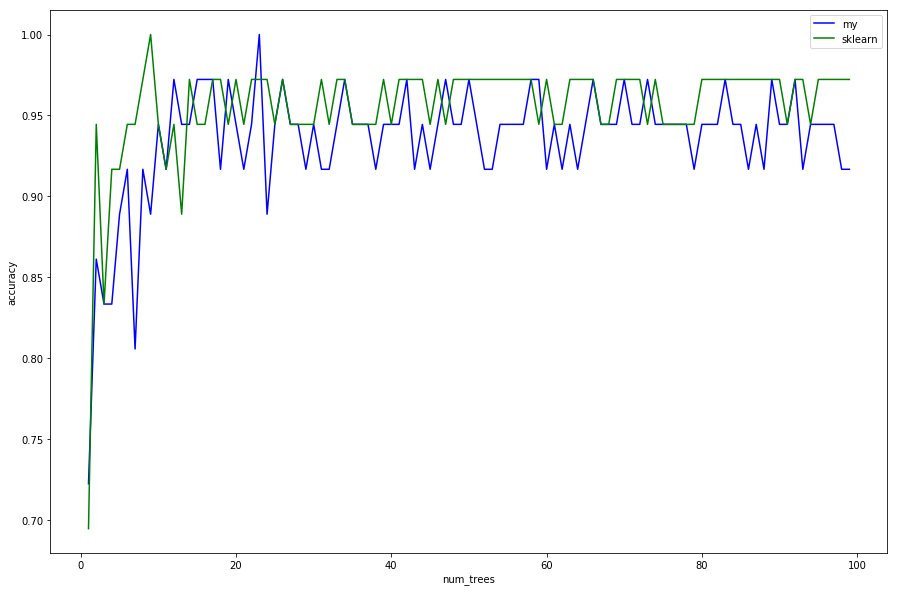

In [62]:
num_trees_array = list(range(1,100))
scores_my = []
scores_sklearn = []

for num_trees in num_trees_array:
    clf_my = ModifiedRandomForest(num_trees=num_trees, max_depth=2, max_features="sqrt", criterion='gini')
    clf_my.fit(X_train, y_train.ravel())
    scores_my.append(accuracy_score(y_test, clf_my.predict(X_test)))

    clf_sklearn= RandomForestClassifier(n_estimators=num_trees, criterion='gini', max_depth=2, max_features="sqrt")
    clf_sklearn.fit(X_train, y_train.ravel())
    scores_sklearn.append(accuracy_score(y_test, clf_sklearn.predict(X_test)))
    
plt.figure(figsize=(15,10))
plt.plot(num_trees_array, scores_my, color='blue', label="my")
plt.plot(num_trees_array, scores_sklearn, color='green', label="sklearn")
plt.xlabel('num_trees')
plt.ylabel('accuracy')
plt.legend()

**Вывод:** Как мы видим, модифированный RandomForest хуже приближает RandomForest из sklearn, чем не модифицированный, то есть accuracy модифицированного RandomForest в среднем меньше, чем accuracy немодифицированного RandomForest.